<img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1485763/images/9060062/Header.png" alt="Header" style="width: 800px;"/>

# Introducción al Procesamiento del Lenguaje Natural

Fabian Sanchez Salazar 

```
David Flórez Alsina
Juan Pablo Sierra Useche
```

Febrero 28, 2022

-----

# Taller 01: Procesamiento

## Indicaciones

- Los siguientes puntos se realizaran en grupos de dos integrantes.

- El día 24 de febrero se avanzará como trabajo en clase y se subirá a la plataforma los avances. Esa será una primera nota de trabajo en clase.

- La segunda parte debe ser cargada en la plataforma hasta el día martes 28 de febrero en la noche. 

- Guardar el archivo como .pdf y cargarlo a la plataforma.

## General Settings

In [66]:
import re
import string

import numpy             as np
import pandas            as pd
import plotly.express    as px
import matplotlib.pyplot as plt

from unidecode     import unidecode
from PIL           import Image
from collections   import Counter
from wordcloud     import WordCloud, ImageColorGenerator

#--------------------------------------------------------------
import nltk 
import emoji          
import requests
import spacy
import pandas as pd

from bs4            import BeautifulSoup
from pprint         import pprint
from nltk           import RegexpTokenizer, FreqDist
from nltk.tokenize  import sent_tokenize, word_tokenize
from nltk.corpus    import stopwords
from nltk.corpus    import cess_esp
from spacy          import displacy
from collections    import Counter

In [65]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

!python -m spacy download es_core_news_md

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
2023-02-28 02:30:53.256884: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-28 02:30:53.444995: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
20

The following lambda functions are used to give color to plain and borring prints:

In [3]:
HEADER    = lambda m : f"\033[1m\033[95m{m}\033[0m"
WARNING   = lambda m : f"\033[1m\033[101m{m}\033[0m"
UNDERLINE = lambda m : f"\033[4m{m}\033[0m" 
OKGREEN   = lambda m : f"\033[92m{m}\033[0m"
BOLD      = lambda m : f"\033[1m{m}\033[0m"


In [4]:
def simple_grid(x:int,y:int, xi:float=1.0, yi:float=1.0):
    fig, axs = plt.subplots(y, x)
    fig.set_size_inches(18.5 * xi, 10.5 * yi, forward=True)
    return fig, axs

# Desarrollo

## Punto 1


1. Importar y leer la base de tweets:  *tweets_politica.csv*


In [5]:
tweets = pd.read_csv('tweets_politica.csv',delimiter='::::')
tweets = tweets.drop(['cuenta', 'partido', 'timestamp'], axis=1)
tweets.info()

/tmp/ipykernel_271/870287600.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tweets = pd.read_csv('tweets_politica.csv',delimiter='::::')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175342 entries, 0 to 175341
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tweet   175309 non-null  object
dtypes: object(1)
memory usage: 1.3+ MB


2. Agregar al data.frame que se obtiene una columna que cuente las palabras de cada tweet.

In [6]:
tweets["palabras"] = tweets.tweet.str.count(" ") + 1
tweets.head()

tweet  palabras
0  El Partido Popular siempre con la libertad. Ta...      12.0
1  🌞 ¡Buenos días y #FelizViernes!Esta es nuestra...      15.0
2  📻 @IdiazAyuso: “Con @populares hemos convertid...      25.0
3  📻 @IdiazAyuso es entrevistada en @encasadeherr...      15.0
4  👉 Como prometimos, @populares acaba con el enc...      20.0

3. Tomar las primeras 500 filas de la variable ":tweet" y dar respuesta a los siguientes items.

In [7]:
tweets_500 = tweets.head(500)
tweets_500

tweet  palabras
0    El Partido Popular siempre con la libertad. Ta...      12.0
1    🌞 ¡Buenos días y #FelizViernes!Esta es nuestra...      15.0
2    📻 @IdiazAyuso: “Con @populares hemos convertid...      25.0
3    📻 @IdiazAyuso es entrevistada en @encasadeherr...      15.0
4    👉 Como prometimos, @populares acaba con el enc...      20.0
..                                                 ...       ...
495  Mi rotunda condena a los atentados de Sri Lank...      36.0
496  #ElVotoSeUne por España 🇪🇸 ¡Gracias a todos! S...      11.0
497  Cuando el PSOE entra por la puerta el empleo s...      40.0
498  Para mejorar el empleo proponemos🔹“Mochila aus...      38.0
499  Proponemos para crear 500.000 empleos al año🔹R...      36.0

[500 rows x 2 columns]

 + Realice una tabla de frecuencia, un gráfico de barras y un gráfico de líneas del top 20 de las personas que más publican. Analizar los gráficos y responder: ¿cuáles son las 5 cuentas que más tweets publican en ese conjunto de los 500 datos?


In [8]:
def extract_users(tweet):
    return re.findall(r'@(\w+)', tweet)

In [9]:
users_appear = tweets_500.tweet.apply(extract_users).to_frame()
users_appear

tweet
0                                          []
1                                          []
2    [IdiazAyuso, populares, encasadeherrero]
3      [IdiazAyuso, encasadeherrero, esRadio]
4                                 [populares]
..                                        ...
495                                        []
496                                        []
497                                        []
498                                        []
499                                        []

[500 rows x 1 columns]

In [10]:
users_appear = users_appear.explode('tweet').dropna()
Counter(users_appear.tweet)

Counter({'IdiazAyuso': 8,
         'populares': 7,
         'encasadeherrero': 3,
         'esRadio': 2,
         'pablocasado_': 48,
         'AlmeidaPP_': 5,
         'cucagamarra': 9,
         'EspejoPublico': 8,
         'ppmadrid': 1,
         'Desayunos_tve': 11,
         'ALevySoler': 3,
         'elprogramadear': 10,
         'HoyPorHoy': 6,
         'MasDeUno': 2,
         'alferma1': 2,
         'LasMananas_rne': 7,
         'cayetanaAT': 14,
         'HerreraenCOPE': 9,
         'carlosherreracr': 1,
         'tejerinapp': 4,
         'BrujulaOndaCero': 1,
         'telediario_tve': 5,
         'TeoGarciaEgea': 18,
         'JavierMaroto': 4,
         'DebatAlRojoVivo': 8,
         'isabelbonig': 4,
         'BelenHoyo': 3,
         'mjosecatala': 3,
         'pablocasado': 1,
         'JavieraMaroto': 1,
         'eslamananadeFJL': 3,
         'jesusmartinb': 1,
         'abalosmeco': 35,
         'xabierfortes': 2,
         'BeatrizCorredor': 7,
         's': 4,
         '

**Tabla de Frecuencias:**

In [11]:
user_counts = pd.DataFrame([{ 'user': u, 'count': c } for u,c in Counter(users_appear.tweet).most_common(20)])
user_counts


user  count
0      pablocasado_     48
1   Pablo_Iglesias_     37
2        abalosmeco     35
3     TeoGarciaEgea     18
4     Albert_Rivera     18
5       Congreso_Es     17
6        cayetanaAT     14
7     InesArrimadas     14
8     Desayunos_tve     11
9      carmencalvo_     11
10   elprogramadear     10
11   CiudadanoVille     10
12      cucagamarra      9
13    HerreraenCOPE      9
14  sanchezcastejon      9
15       IdiazAyuso      8
16    EspejoPublico      8
17  DebatAlRojoVivo      8
18        populares      7
19   LasMananas_rne      7

**Gráfico de Barras:**

In [12]:
fig = px.bar(user_counts, x="user", y="count", title='Top 20 usuarios que más publican (500 tweets)')
fig.show()

**Gráfico de Lineas:**

In [13]:
fig = px.line(user_counts, x='user', y='count', title='Top 20 usuarios que más publican (500 tweets)', markers=True, line_shape='spline')
fig.show()

 + Repita el punto anterior con la totalidad de los tweets y graficando el top 20.

In [14]:
users_appear_tot = tweets.dropna().tweet.apply(extract_users).to_frame()
users_appear_tot

tweet
0                                             []
1                                             []
2       [IdiazAyuso, populares, encasadeherrero]
3         [IdiazAyuso, encasadeherrero, esRadio]
4                                    [populares]
...                                          ...
175337             [CsRegionMurcia, laverdad_es]
175338                                        []
175339                  [InCicloVeritas, Fundeu]
175340                  [InCicloVeritas, Fundeu]
175341        [GuillermoDiazCs, sanchezcastejon]

[175309 rows x 1 columns]

In [15]:
users_appear_tot = users_appear_tot.explode('tweet').dropna()
Counter(users_appear_tot.tweet)

Counter({'IdiazAyuso': 655,
         'populares': 1354,
         'encasadeherrero': 83,
         'esRadio': 163,
         'pablocasado_': 3369,
         'AlmeidaPP_': 461,
         'cucagamarra': 668,
         'EspejoPublico': 721,
         'ppmadrid': 109,
         'Desayunos_tve': 341,
         'ALevySoler': 108,
         'elprogramadear': 576,
         'HoyPorHoy': 445,
         'MasDeUno': 276,
         'alferma1': 462,
         'LasMananas_rne': 666,
         'cayetanaAT': 276,
         'HerreraenCOPE': 311,
         'carlosherreracr': 18,
         'tejerinapp': 22,
         'BrujulaOndaCero': 151,
         'telediario_tve': 24,
         'TeoGarciaEgea': 1213,
         'JavierMaroto': 231,
         'DebatAlRojoVivo': 546,
         'isabelbonig': 28,
         'BelenHoyo': 44,
         'mjosecatala': 24,
         'pablocasado': 19,
         'JavieraMaroto': 1,
         'eslamananadeFJL': 207,
         'jesusmartinb': 4,
         'abalosmeco': 762,
         'xabierfortes': 20,
      

**Tabla de Frecuencias:**

In [16]:
user_counts_tot = pd.DataFrame([{ 'user': u, 'count': c } for u,c in Counter(users_appear_tot.tweet).most_common(20)])
user_counts_tot

user  count
0   sanchezcastejon   4586
1      pablocasado_   3369
2     InesArrimadas   2568
3        BalEdmundo   1641
4     Santi_ABASCAL   1434
5         populares   1354
6       Congreso_Es   1352
7            vox_es   1291
8        Adrilastra   1273
9              PSOE   1249
10    TeoGarciaEgea   1213
11     CiudadanosCs    983
12    PabloIglesias    946
13     IreneMontero    855
14  Pablo_Iglesias_    830
15    Albert_Rivera    792
16       abalosmeco    762
17  montesinospablo    738
18                s    731
19    EspejoPublico    721

**Gráfico de Barras:**

In [17]:
fig = px.bar(user_counts_tot, x='user', y='count', title='Top 20 usuarios que más publican', barmode='stack')

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

**Gráfico de Linea:**

In [18]:
fig = px.line(user_counts_tot, x='user', y='count', title='Top 20 usuarios que más publican', markers=True, line_shape='spline')
fig.show()

 + Haga una nube de palabras donde se muestre el hashtag más posteado en los 500 tweets. ¿Cuántas veces fue posteado en los 500 tweets y en la base total?

In [19]:
def ht_ctr(tweets):
    hashtags = []
    for tweet in tweets:
        hashtags += map(lambda x: x.replace('#',''), re.findall(r'\#\w+', tweet))
    return Counter(hashtags)

**500 Tweets:**

In [20]:
hashtags_counter = ht_ctr(tweets_500.tweet)
most_common_hashtag_500 = hashtags_counter.most_common(1)[0]

print('El hashtag más popular es', HEADER(most_common_hashtag_500[0]), 'con ', HEADER(most_common_hashtag_500[1]), "apariciones.")

El hashtag más popular es OlaNaranja con  61 apariciones.


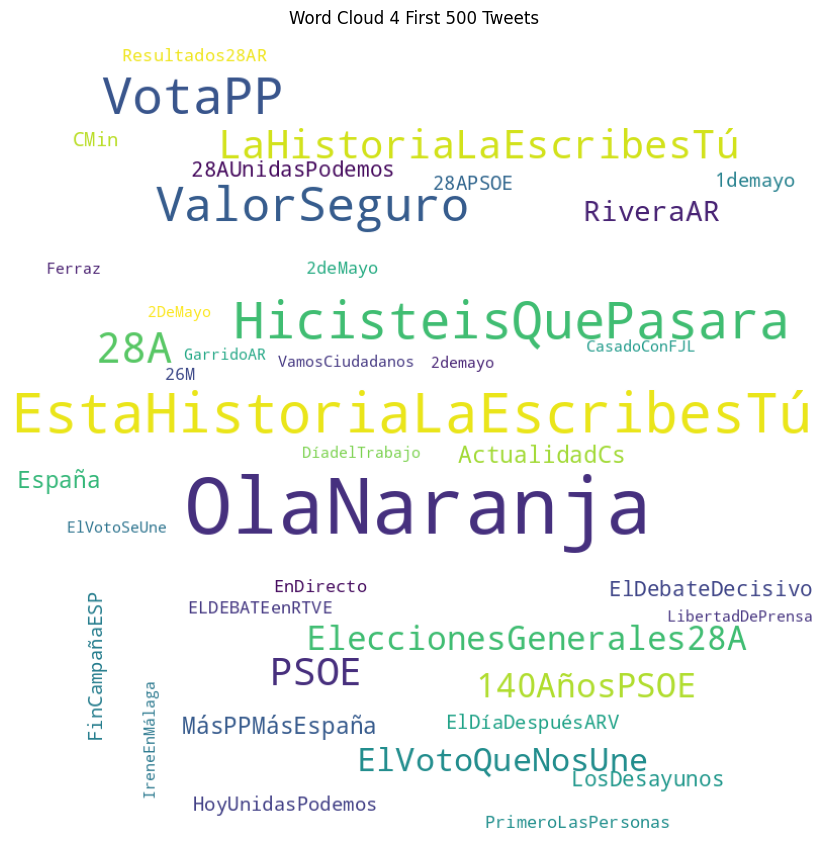

In [21]:
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=15).generate_from_frequencies(hashtags_counter)

fig, axs = simple_grid(1,1)

axs.imshow(wordcloud)
axs.axis('off')
axs.set_title('Word Cloud 4 First 500 Tweets')

plt.show()

**All tweets:**

In [22]:
ht_ctr(tweets.dropna().tweet)

Counter({'LibertadDePrensa': 8,
         'FelizViernes': 105,
         '2DeMayo': 6,
         '2deMayo': 16,
         'TejerinaEnOndaCero': 2,
         'TejerinaEnOndaCeroSíguela': 1,
         'EsHerrero': 9,
         '28A': 260,
         'España': 510,
         'ÚLTIMAHORA': 68,
         'EleccionesGenerales28A': 24,
         'MásPPMásEspaña': 7,
         'VotaPP': 161,
         'ElVotoQueNosUne': 18,
         'ValorSeguro': 76,
         'ElVotoSeUne': 5,
         'FinCampañaESP': 9,
         'CasadoConFJL': 3,
         'CMIN': 36,
         'DíaConvenciónDiscapacidadRecordar': 1,
         'PGE2019': 1,
         'LosDesayunos': 141,
         'AcosoEscolar': 2,
         'StopBullying': 3,
         '140AñosPSOE': 23,
         'estabilidad': 2,
         'progreso': 3,
         'igualdad': 65,
         'PSOE': 867,
         '140añosPSOE': 5,
         'ComunidadDeMadrid': 4,
         '2demayo': 5,
         'libertad': 77,
         'justiciasocial': 6,
         '140AniversarioPSOE': 2,
     

In [23]:
hashtags_counter_tot = ht_ctr(tweets.dropna().tweet)
most_common_hashtag_tot = hashtags_counter_tot.most_common(1)[0]

print('El hashtag más popular es', HEADER(most_common_hashtag_tot[0]), 'con ', HEADER(most_common_hashtag_tot[1]), "apariciones.")

El hashtag más popular es ActualidadCs con  1762 apariciones.


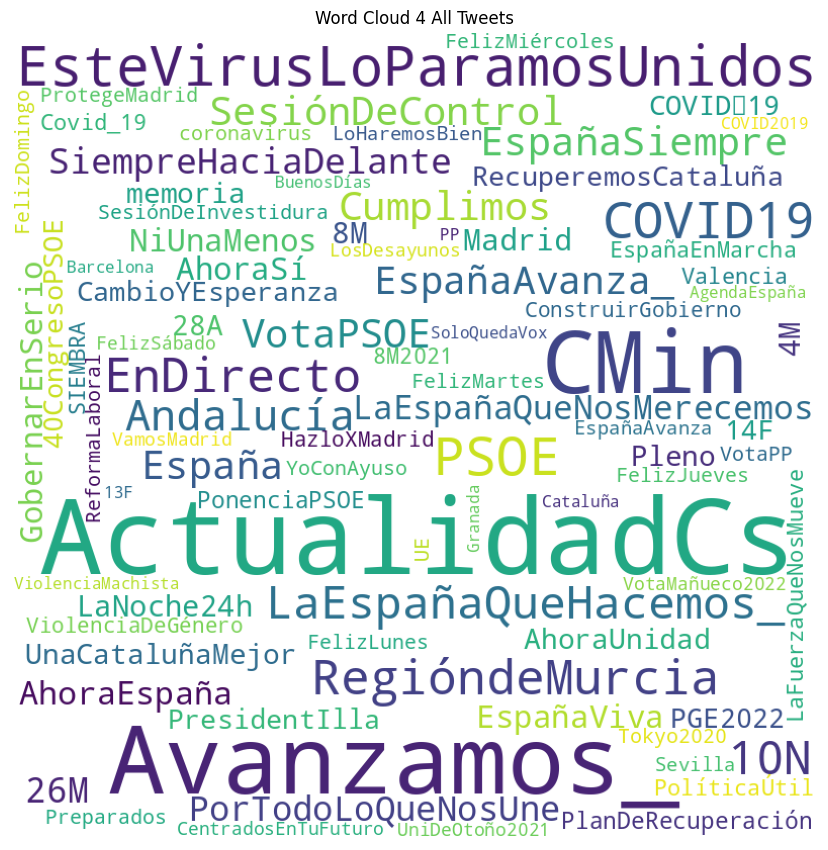

In [24]:
wordcloud_tot = WordCloud(width=800, height=800, background_color='white', min_font_size=15).generate_from_frequencies(hashtags_counter_tot)

fig, axs = simple_grid(1,1)

axs.imshow(wordcloud_tot)
axs.axis('off')
axs.set_title('Word Cloud 4 All Tweets')

plt.show()

 + Guarde la imagen en .png o .jpg para y cárguela en la carpeta

In [25]:
wordcloud.to_file("wc1.png")
wordcloud_tot.to_file("wc2.png")


 + ¿Se puede cambiar la forma de la nube de palabras a una imagen personalizada?

Si...

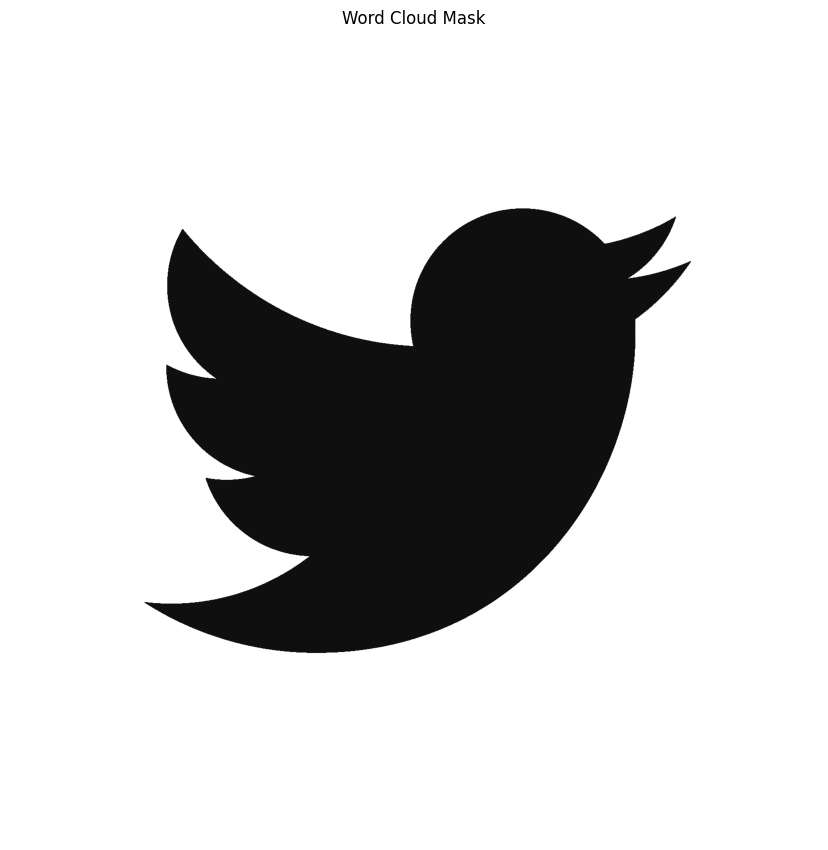

In [26]:
mask = np.array(Image.open("logo_twitter.png"))

fig, axs = simple_grid(1,1)


mask = np.abs(mask - 255)

mask[mask==1] = 255


axs.imshow(mask, cmap='gray')
axs.set_title('Word Cloud Mask')
axs.axis('off')
plt.show()

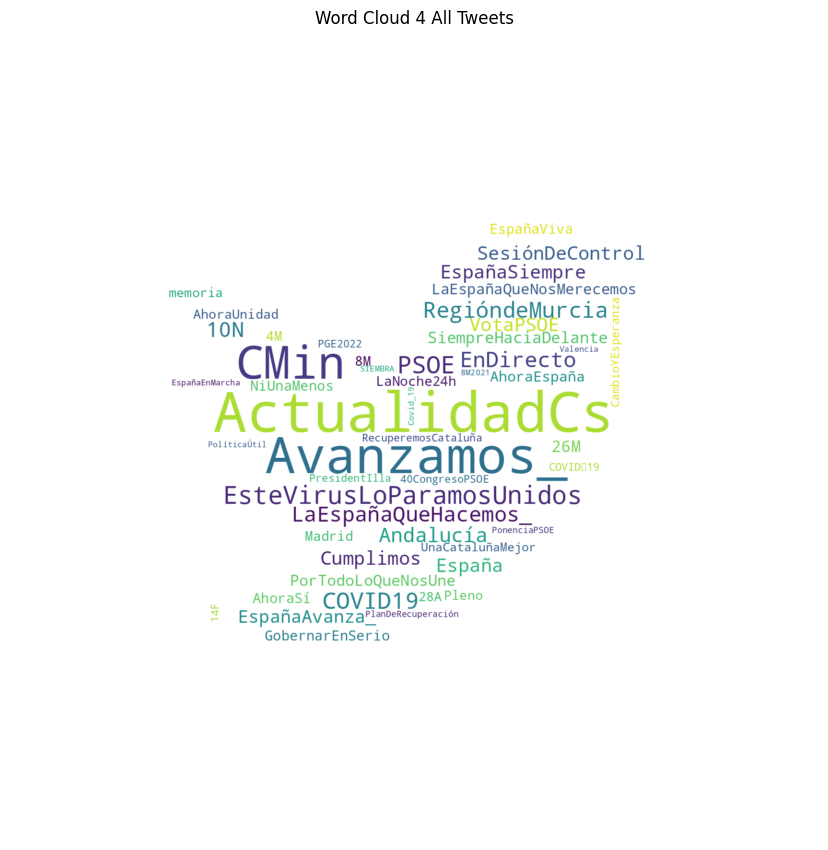

In [27]:
wordcloud_tot2 = WordCloud(
    width=1687,
    height=1687,
    background_color='white', 
    min_font_size=15,
    max_words=50, 
    collocations=False,
    mask=mask,
    ).generate_from_frequencies(hashtags_counter_tot)


fig, axs = simple_grid(1,1)

axs.imshow(wordcloud_tot2, interpolation='bilinear')
axs.axis('off')
axs.set_title('Word Cloud 4 All Tweets')
wordcloud_tot2.to_file("wc_shape.png")

plt.show()

## Punto 2


1. Importar el archivo .txt:  *Cien_años_GGM.txt* (fragmento de cien años de soledad)

2. ¿Cuántas palabras y oraciones tiene el texto?

3. Hacer el preprocesamiento del texto

   + Convertir todo el texto a minúscula

   + Conservar solo palabras

   + Crear una función para quitar tildes

   + Tokenizar

   + Quitar las stop.words ¿Cuáles son las 10 palabras más usadas y que no son de parada?
   
   + Contar cuantas ocurrencias hay por cada parte de la oración (tagging)

1. Importar el archivo .txt:  *Cien_años_GGM.txt* (fragmento de cien años de soledad)

In [107]:
with open('Cien_años_GGM.txt') as f:
    txt_file = f.readlines()

#replace the new line characters with nothing
text = " ".join(txt_file)
text = text.replace("\n", "")


2. ¿Cuántas palabras y oraciones tiene el texto? ***tiene 133 oraciones y 4306 palabras.***


In [108]:
# get the words and sentences of the hole text
sentenses = sent_tokenize(text, language='spanish')
words = word_tokenize(text, language='spanish')

print(HEADER("number of sentences:"), f"{len(sentenses)}", HEADER("\nnumber of words:"),len(words))

number of sentences: 133 
number of words: 4306


3. Hacer el preprocesamiento del texto:
+ Convertir todo el texto a minúscula


In [109]:
#turn into lower case
text = text.lower()

   + Crear una función para quitar tildes


In [110]:
#function to replace the tildes
def remove_tildes(text: str):
    remap = {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u'}

    for search_w, replace_w in remap.items():
        text = text.replace(search_w, replace_w)

    return text

In [111]:
#calls the function which substitutes the tildes with the characters 
#without tilde
text = remove_tildes(text)
text

'gabriel garcia marquez     cien años de soledad     editado por "ediciones la cueva"     para j omi garcia ascot  y maria luisa elio     cien años de soledad     gabriel garcia marquez     muchos años despues, frente al peloton de fusilamiento, el coronel aureliano buendia habia de  recordar aquella tarde remota en que su padre lo llevo a conocer el hielo. macondo era entonces  una aldea de veinte casas de barro y cañabrava construidas a la orilla de un rio de aguas diafanas  que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos  prehistoricos. el mundo era tan reciente, que muchas cosas carecian de nombre, y para  mencionarlas habia que señalarias con el dedo. todos los años, por el mes de marzo, una familia  de gitanos desarrapados plantaba su carpa cerca de la aldea, y con un grande alboroto de pitos y  timbales daban a conocer los nuevos inventos. primero llevaron el iman. un gitano corpulento, de  barba montaraz y manos de gorrion, que se presento con

+ Conservar solo palabras


In [112]:
tokenizer = RegexpTokenizer(r'\w+')
text_words = tokenizer.tokenize(text)
text_words = " ".join(text_words)

+ Tokenizar (palabras)


In [113]:
# get the words of the hole text
words = word_tokenize(text_words, language='spanish')
len(words)

3865

   + Quitar las stop.words ¿Cuáles son las 10 palabras más usadas y que no son de parada?


In [114]:
#dropping stop words
stopwords = nltk.corpus.stopwords.words('spanish')
words0 = [word for word in words if word not in stopwords]

#doing a frequency analisys and getting the 10 most used words
word_freq_dist = FreqDist(words0).most_common(10)
word_freq_dist = pd.Series(dict(word_freq_dist))

#plotting what we found
fig = px.line(word_freq_dist, markers=True, line_shape='spline')
fig.update_xaxes(tickangle=-30)
fig.update_layout( title = "Word frequencies",
                   xaxis_title = "Words",
                   yaxis_title = "Freqs", 
                   showlegend  =  False)
fig.show()

   + Contar cuantas ocurrencias hay por cada parte de la oración (tagging), empezamos por instalar el modelo de spacy que nos va a ayudar con la etiquetación de la categoría gramática de las palabras en las oraciones, cabe mencionar que nltk aún no soporta español.

In [117]:
!python -m spacy validate

2023-02-28 02:47:33.891002: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-28 02:47:34.069031: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-28 02:47:34.069069: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-28 02:47:34.102251: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-28 02:47:36.469514: W tensorflow/stream_executor/pla

Con el modelo importado le pasamos el texto que hemos preprocesado, para así ver qué categoría es la más predominante.

In [118]:
nlp = spacy.load('es_core_news_md')
tagged_words = nlp(text_words)
tagged_words

gabriel garcia marquez cien años de soledad editado por ediciones la cueva para j omi garcia ascot y maria luisa elio cien años de soledad gabriel garcia marquez muchos años despues frente al peloton de fusilamiento el coronel aureliano buendia habia de recordar aquella tarde remota en que su padre lo llevo a conocer el hielo macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un rio de aguas diafanas que se precipitaban por un lecho de piedras pulidas blancas y enormes como huevos prehistoricos el mundo era tan reciente que muchas cosas carecian de nombre y para mencionarlas habia que señalarias con el dedo todos los años por el mes de marzo una familia de gitanos desarrapados plantaba su carpa cerca de la aldea y con un grande alboroto de pitos y timbales daban a conocer los nuevos inventos primero llevaron el iman un gitano corpulento de barba montaraz y manos de gorrion que se presento con el nombre de melquiades hizo una truculenta demost

In [120]:
tagging = []
for token in tagged_words:
    tagging.append( (token.lemma_, token.pos_, token.dep_) )

tagging = pd.DataFrame(tagging, columns=["word", "category", "dep"])
freqs = tagging.groupby("category").count()["word"].sort_values()

#plotting what we found
fig = px.line(freqs, markers=True, line_shape='spline')
fig.update_xaxes(tickangle=-30)
fig.update_layout( title = "Word Category Frequencies",
                   xaxis_title = "Category",
                   yaxis_title = "Freqs", 
                   showlegend  =  False)
fig.show()

Como podemos ver los sustantivos, los determinantes y las adposiciones son las más frecuentes, en el texto sin preprocesar estos son los resultados:

Podemos notar que categorías como SYM (simbolo), SPACE (espaciados), PUNCT (puntuación), ahora si aparecen dentro de las categorías

In [121]:
tagged_words = nlp(text)

tagging = []
for token in tagged_words:
    tagging.append( (token.lemma_, token.pos_, token.dep_) )

tagging = pd.DataFrame(tagging, columns=["word", "category", "dep"])
freqs = tagging.groupby("category").count()["word"].sort_values()

#plotting what we found
fig = px.line(freqs, markers=True, line_shape='spline')
fig.update_xaxes(tickangle=-30)
fig.update_layout( title = "Word Category Frequencies",
                   xaxis_title = "Category",
                   yaxis_title = "Freqs", 
                   showlegend  =  False)
fig.show()

## Punto 3

1. Escoger una página web que contenga texto (noticias, articulo, cuento, historia, etc.)

2. Utilizar la librería BeautifulSoup para leer el texto HTML

3. Hacer preprocesamiento de la información de la página web.

4. Describir en una nube de palabras lo que está en la página web.

1. Escoger una página web que contenga texto (noticias, articulo, cuento, historia, etc.)


In [36]:
# We choose:

#  $$$$$$$$\ $$\                                                                                
#  \__$$  __|$$ |                                                                             
#     $$ |   $$$$$$$\   $$$$$$\         $$$$$$\   $$$$$$\   $$$$$$\  $$$$$$$\          
#     $$ |   $$  __$$\ $$  __$$\       $$  __$$\ $$  __$$\ $$  __$$\ $$  __$$\        
#     $$ |   $$ |  $$ |$$$$$$$$ |      $$ /  $$ |$$ /  $$ |$$ |  \__|$$ |  $$ |      
#     $$ |   $$ |  $$ |$$   ____|      $$ |  $$ |$$ |  $$ |$$ |      $$ |  $$ |      
#     $$ |   $$ |  $$ |\$$$$$$$\       $$$$$$$  |\$$$$$$  |$$ |      $$ |  $$ |       
#     \__|   \__|  \__| \_______|      $$  ____/  \______/ \__|      \__|  \__|      
#                                      $$ |                                                                                  
#                                      $$ |                                                                                  
#                                      \__|                                                                                  

#              $$\                 $$\           
#              $$ |                $$ |          
#         $$$$$$$ |$$\   $$\  $$$$$$$ | $$$$$$\  
#        $$  __$$ |$$ |  $$ |$$  __$$ |$$  __$$\ 
#        $$ /  $$ |$$ |  $$ |$$ /  $$ |$$$$$$$$ |
#        $$ |  $$ |$$ |  $$ |$$ |  $$ |$$   ____|
#        \$$$$$$$ |\$$$$$$  |\$$$$$$$ |\$$$$$$$\ 
#         \_______| \______/  \_______| \_______|


2. Utilizar la librería BeautifulSoup para leer el texto HTML




In [37]:
def build_corpus():

    post_processed_corpus = []

    for i in range(1, 10):
        url = f'https://theporndude.com/blog/category/porn-news/page/{i}/'
        data = requests.get(url)

        html = BeautifulSoup(data.text, 'html.parser')

        #gets all the h2 tags which contain an "a" tag with the url to the posts
        posts_html = html.find_all("h2")
        url_to_posts = []

        #gets the posts urls
        for post in posts_html[1:]:
            url_to_posts.append([result.get("href") for result in post.find_all("a")])


        #loads the articles from the list of urls
        articles = []

        for url in url_to_posts:
            data = requests.get(url[0])
            articles.append(BeautifulSoup(data.text, 'html.parser'))


        #builds a corpus by extracting the text from each article
        corpus = []
        for article in articles:

            #for each article creates a list with the articles text
            txt = []
            paragraphs = article.find_all("p")

            for p in paragraphs:
                txt.append(p.getText())        

            corpus.append(txt)

        #joins the lines of te text of each article
        for c in corpus:
            post_processed_corpus.append(" ".join(c))

    return post_processed_corpus

In [38]:
corpus = build_corpus()

3. Hacer preprocesamiento de la información de la página web.

In [39]:
def process_text(corpus):

    tokenizer = RegexpTokenizer(r'\w+')
    stopwords = nltk.corpus.stopwords.words('english') + ['first', 'one', 'even']

    all_words = []
    
    for text in corpus:
        #replace the new line characters with nothing
        text = text.replace("\n", "")

        #turn into lower case
        text = text.lower()

        #extract the words
        text_words = tokenizer.tokenize(text)

        #dropping stop words
        words = [word for word in text_words if word not in stopwords]

        for word in words:
            all_words.append(word)

    return all_words


4. Describir en una nube de palabras lo que está en la página web.

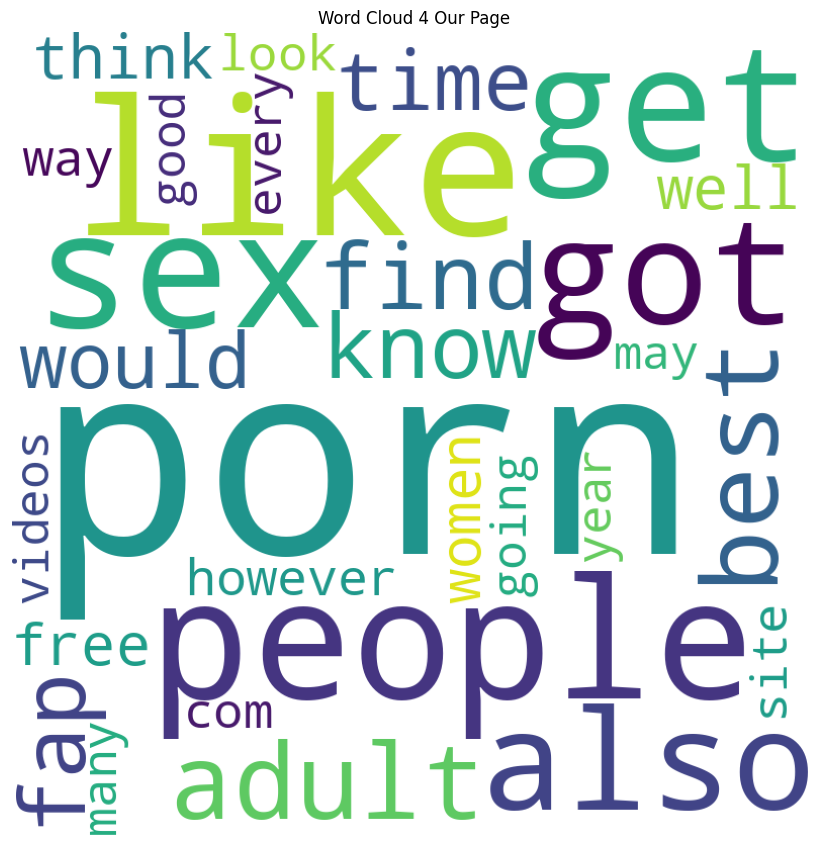

In [46]:
words = process_text(corpus)

#doing a frequency analisys and getting the 10 most used words
word_freq_dist = FreqDist(words).most_common(30)
word_freq_dist = pd.Series(dict(word_freq_dist))

wordcloud_tot = WordCloud(width=800,
                          height=800,
                          background_color='white',
                          min_font_size=15).generate_from_frequencies(word_freq_dist)

fig, axs = simple_grid(1,1)

axs.imshow(wordcloud_tot)
axs.axis('off')
axs.set_title('Word Cloud 4 Our Page')

plt.show()

## Punto 4

Defina una función de preprocesado teniendo en cuenta:

- Pasar a minúsculas

- Remover caracteres especiales

- Remover tildes

- Tokenizar

- Eliminar las stop.words (español o inglés, según sea el caso)

- Regrese la cadena de texto simplificada.

In [41]:
def preprocess_text(text, language:str='spanish'):
    """
    Función que realiza preprocesado de un texto:
    1. Pasar a minúsculas
    2. Remover caracteres especiales
    3. Remover tildes
    4. Tokenizar
    5. Eliminar las stop.words
    
    Parámetros:
        - text: cadena de texto a preprocesar
        - language: idioma de las stop words a utilizar
        
    Retorna:
        - Cadena de texto preprocesada
    """
    # Pasar a minúsculas
    text = text.lower()
    
    # Eliminar caracteres especiales
    text = re.sub(r'\d+', '', text)  # remover números
    text = text.translate(str.maketrans('', '', string.punctuation))  # remover puntuación

    # Remover tildes
    text = unidecode(text)
    
    # Tokenizar
    tokens = word_tokenize(text)
    
    # Eliminar las stop words
    stop_words = set(stopwords.words(language))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Unir tokens en una cadena de texto
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text


**Test:**

In [42]:
text = '📻 @IdiazAyuso: “Con @populares hemos convertido Madrid en una región europea, moderna, con los mejores hospitales, las mejores infraestructuras y los impuestos más bajos”. @encasadeherrero'

print(HEADER("Frase Original:"), text)
print(HEADER("Frase Filtrada:"), preprocess_text(text))

Frase Original: 📻 @IdiazAyuso: “Con @populares hemos convertido Madrid en una región europea, moderna, con los mejores hospitales, las mejores infraestructuras y los impuestos más bajos”. @encasadeherrero


AttributeError: 'list' object has no attribute 'words'

In [ ]:
#                                ▀██▀─▄███▄─▀██─██▀██▀▀█
#                                ─██─███─███─██─██─██▄█
#                                ─██─▀██▄██▀─▀█▄█▀─██▀█
#                                ▄██▄▄█▀▀▀─────▀──▄██▄▄█
#                                              _..  
#                                          .qd$$$$bp.
#                                        .q$$$$$$$$$$m.
#                                       .$$$$$$$$$$$$$$
#                                     .q$$$$$$$$$$$$$$$$
#                                    .$$$$$$$$$$$$P\$$$$;
#                                  .q$$$$$$$$$P^"_.`;$$$$
#                                 q$$$$$$$P;\   ,  /$$$$P
#                               .$$$P^::Y$/`  _  .:.$$$/
#                              .P.:..    \ `._.-:.. \$P
#                              $':.  __.. :   :..    :'
#                             /:_..::.   `. .:.    .'|
#                           _::..          T:..   /  :
#                        .::..             J:..  :  :
#                     .::..          7:..   F:.. :  ;
#                 _.::..             |:..   J:.. `./
#            _..:::..               /J:..    F:.  : 
#          .::::..                .T  \:..   J:.  /
#         /:::...               .' `.  \:..   F_o'
#        .:::...              .'     \  \:..  J ;
#        ::::...           .-'`.    _.`._\:..  \'
#        ':::...         .'  `._7.-'_.-  `\:.   \
#         \:::...   _..-'__.._/_.--' ,:.   b:.   \._ 
#          `::::..-"_.'-"_..--"      :..   /):.   `.\   
#            `-:/"-7.--""            _::.-'P::..    \} 
# _....------""""""            _..--".-'   \::..     `. 
#(::..              _...----"""  _.-'       `---:..    `-.
# \::..      _.-""""   `""""---""                `::...___)
#  `\:._.-"""                             
#
#  pd: no borrar 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=be42e5b6-c07d-4eef-b7e1-e7207e46c81a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>